## Tasks

Note: Record the observations from every task to select the features for the future prediction

1. Check the feature types to understand what types of variables will be dealt with.
2. Distinguish the features for the right visualization technique based on their types.
3. Perform visual analysis:
    a. Regression plot for the continuous valriables
    b. boxplots for the cateragorical variables
4. Use groupby method on all the categorical features and find out the mean price (target) for unique categories on each feature
5. Perform statistical analysis on the same features:
    a. Correlation on the numerical features
    b. ANOVA on the categorical features


#### importing the libraries and the data

In [241]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [242]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


#### 1. Check the feature types to understand what types of variables will be dealt with

In [243]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
city-L/100km         float64
horsepower-binned     object
diesel                 int64
gas                    int64
dtype: object

Observations:
1. float type : wheel-base, length, width, height, bore, stroke, compression-ratio, horsepower, peak-rpm, price, city-L/100km
2. int type:symboling, normalized-losses, curb-weight, engine-size, city-mpg, highway-mpg, diesel, gas
3. object type: make, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system, horsepower-binned

#### 2. Distinguish the features for the right visualization technique based on their types.

##### Regression plot: 
wheel-base, length, width, height, bore, stroke, compression-ratio, horsepower, peak-rpm, price, city-L/100km, symboling, normalized-losses, curb-weight, engine-size, city-mpg, highway-mpg

##### Boxplot: 
make, aspiration, num-of-doors, body-style, drive-wheels, engine-location, engine-type, num-of-cylinders, fuel-system, horsepower-binned

#### 3. Perform visual analysis: 
#### a. Regression plot for the continuous valriables

(0, 48288.880170010074)

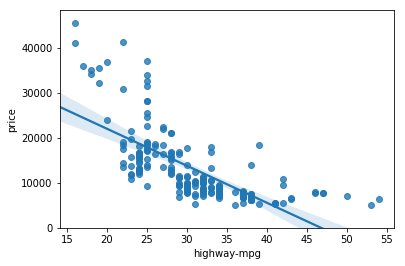

In [244]:
sns.regplot(x = 'highway-mpg', y = 'price', data = df)
plt.ylim(0,)

#### b. Boxplots for the cateragorical variables:

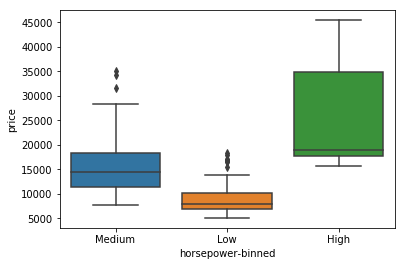

In [245]:
sns.boxplot(x = 'horsepower-binned', y = 'price', data = df)

Observations:
1. Highly related numerical features: wheel-base, length, width, bore, horsepower, curb-weight, engine-size, city-mpg, highway-mpg
2. Highly related categorical features: drive-wheels, engine-location, horsepower-binned
3. Unable to observe any dependable relations: make, aspiration, num-of-doors, engine-type, num-of-cylinders, fuel-system, body-style

#### 4.Use groupby method on all the categorical features and find out the mean price (target) for unique categories on each feature

In [246]:
df[['body-style','price']].groupby(['body-style'],as_index=False).mean()


,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


#### 5. Perform statistical analysis on the same features:
    a. Correlation on the numerical features

In [247]:
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008245,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,-0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055563,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,-0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158502,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.124139,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188829,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.062704,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167562,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.209523,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,0.054458,-0.054458
stroke,-0.008245,0.055563,0.158502,0.124139,0.188829,-0.062704,0.167562,0.209523,-0.055390,1.000000,0.187923,0.098462,-0.065713,-0.034696,-0.035201,0.082310,0.037300,0.241303,-0.241303


In [248]:
for column in df[['wheel-base', 'length', 'width', 'bore', 'horsepower', 'curb-weight', 'engine-size', 'city-mpg', 'highway-mpg']]:
    pearson_coef, p_value = stats.pearsonr(df[column], df['price'])
    print("The Pearson Correlation Coefficient is", pearson_coef, " for ",column, " with a P-value of P =", p_value) 

The Pearson Correlation Coefficient is 0.5846418222655081  for  wheel-base  with a P-value of P = 8.076488270732955e-20
The Pearson Correlation Coefficient is 0.690628380448364  for  length  with a P-value of P = 8.016477466159053e-30
The Pearson Correlation Coefficient is 0.7512653440522674  for  width  with a P-value of P = 9.200335510481426e-38
The Pearson Correlation Coefficient is 0.5431553832626602  for  bore  with a P-value of P = 8.049189483935364e-17
The Pearson Correlation Coefficient is 0.8095745670036559  for  horsepower  with a P-value of P = 6.36905742825998e-48
The Pearson Correlation Coefficient is 0.8344145257702846  for  curb-weight  with a P-value of P = 2.1895772388936997e-53
The Pearson Correlation Coefficient is 0.8723351674455185  for  engine-size  with a P-value of P = 9.265491622197996e-64
The Pearson Correlation Coefficient is -0.6865710067844677  for  city-mpg  with a P-value of P = 2.3211320655676368e-29
The Pearson Correlation Coefficient is -0.704692265058

In [249]:
df_grped = df[['make', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system', 'horsepower-binned']]

In [250]:
for column in df_grped:
    grp_test = df[[column, 'price']].groupby([column])
    df_value_count = df[column].value_counts().to_frame()
    for i in range(df[column].value_counts().count()):
        #print(df_value_count.index[i])
        f_val, p_val = stats.f_oneway(grp_test.get_group(df_value_count.index[i])['price'], grp_test.get_group(df_value_count.index[i+1])['price'])  
        print( "ANOVA results: F=", f_val, "column : ",df_value_count.index[i],", P =", p_val)

ANOVA results: F= 0.23548864711116335 column :  toyota , P = 0.6296912045220452
ANOVA results: F= 0.027345725134104878 column :  nissan , P = 0.8696652635632132
ANOVA results: F= 1.1315240611181339 column :  mazda , P = 0.2965386404445762
ANOVA results: F= 1.071138302758217 column :  mitsubishi , P = 0.31100492924816076
ANOVA results: F= 4.98186487468977 column :  honda , P = 0.03564326325408069
ANOVA results: F= 3.3277747168993366 column :  volkswagen , P = 0.08173220907695534
ANOVA results: F= 63.3159134330995 column :  subaru , P = 8.975176200228681e-08
ANOVA results: F= 4.545452857492624 column :  peugot , P = 0.04559364969623524
ANOVA results: F= 62.039338310709134 column :  volvo , P = 3.05637465556399e-07
ANOVA results: F= 116.59826476792247 column :  dodge , P = 1.803080252847935e-08
ANOVA results: F= 3.436989703150811 column :  mercedes-benz , P = 0.08493888959244532
ANOVA results: F= 25.186253973182886 column :  bmw , P = 0.00023510885590381789
ANOVA results: F= 37.0122198020

IndexError: index 22 is out of bounds for axis 0 with size 22

In [251]:
grouped_test2=df[['num-of-doors', 'price']].groupby(['num-of-doors'])
grouped_test2.head(1)

,num-of-doors,price
0,two,13495.0
3,four,13950.0


In [252]:
a = df['num-of-doors'].value_counts().to_frame()
a.head()

,num-of-doors
four,115
two,86


In [253]:
a.index[0]

'four'

In [254]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('four')['price'], grouped_test2.get_group('two')['price'])  
 
print( "ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.35899737117070574 , P = 0.5497450927348373


In [255]:
df['make'].unique().shape

(22,)

#### Selected Columns:
1. Numerical: wheel-base, length, width, bore, horsepower, curb-weight, engine-size, city-mpg, highway-mpg
2. Categorical: drive-wheels, engine-location, horsepower-binned

In [256]:
final_df = df[['length', 'width', 'wheel-base', 'bore', 'horsepower', 'curb-weight', 'drive-wheels', 'engine-size', 'engine-location', 'city-mpg', 'highway-mpg', 'price']]
final_df.head()

,length,width,wheel-base,bore,horsepower,curb-weight,drive-wheels,engine-size,engine-location,city-mpg,highway-mpg,price
0,0.811148,0.890278,88.6,3.47,111.0,2548,rwd,130,front,21,27,13495.0
1,0.811148,0.890278,88.6,3.47,111.0,2548,rwd,130,front,21,27,16500.0
2,0.822681,0.909722,94.5,2.68,154.0,2823,rwd,152,front,19,26,16500.0
3,0.848630,0.919444,99.8,3.19,102.0,2337,fwd,109,front,24,30,13950.0
4,0.848630,0.922222,99.4,3.19,115.0,2824,4wd,136,front,18,22,17450.0


In [257]:
final_df.to_csv("final_automobile.csv", index = False)

# THE END